# Project -6 : Student Grades Prediction

**Project Description:**

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades.


Columns Description-  Total 43 columns

Seat No : The enrolled number of candidate that took the exams.

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
• All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam.

**Predict - CGPA of a student based on different grades in four years.**



In [1]:
# Importing necessary libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

In [4]:
# Importing Dataset:

data = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv")
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [5]:
# To Display top 5 rows :

data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [8]:
data.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

**There are some columns which are not in the form AB-XXX i.e HS-105/12 , HS-205/20 . So we need to rename these subjects in the followed pattern.**

In [9]:
data.rename(columns ={'HS-105/12': 'HS-105', 'HS-205/20': 'HS-205'},inplace=True)

In [10]:
# To verify:

data.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111', 'CS-105',
       'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205', 'MT-222',
       'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217',
       'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302',
       'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317',
       'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412',
       'CGPA'],
      dtype='object')

In [11]:
# Dropping Inconsistent columns: Seat no. doesn't seems related to CGPA , So let's drop this column.

data.drop(['Seat No.'],axis=1,inplace = True)

In [12]:
data.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [16]:
# Finding null values:

data.isnull().sum()

PH-121     0
HS-101     0
CY-105     1
HS-105     1
MT-111     2
CS-105     0
CS-106     2
EL-102     2
EE-119     2
ME-107     2
CS-107     2
HS-205     5
MT-222     5
EE-222     7
MT-224     7
CS-210     7
CS-211     5
CS-203     5
CS-214     6
EE-217     6
CS-212     6
CS-215     6
MT-331     9
EF-303    10
HS-304    10
CS-301    10
CS-302    10
TC-383    10
MT-442    10
EL-332     9
CS-318     9
CS-306     9
CS-312    10
CS-317    12
CS-403    12
CS-421    12
CS-406    85
CS-414    13
CS-419    13
CS-423    14
CS-412    79
CGPA       0
dtype: int64

**There are null values in most of the columns , we have to treat/remove these null values to get good accuracy.**

In [24]:
# Let's fill these null values with the mode of others:

data_ = data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [25]:
# Let's verify if all the null values are replaced

data_.isnull().sum()

PH-121    0
HS-101    0
CY-105    0
HS-105    0
MT-111    0
CS-105    0
CS-106    0
EL-102    0
EE-119    0
ME-107    0
CS-107    0
HS-205    0
MT-222    0
EE-222    0
MT-224    0
CS-210    0
CS-211    0
CS-203    0
CS-214    0
EE-217    0
CS-212    0
CS-215    0
MT-331    0
EF-303    0
HS-304    0
CS-301    0
CS-302    0
TC-383    0
MT-442    0
EL-332    0
CS-318    0
CS-306    0
CS-312    0
CS-317    0
CS-403    0
CS-421    0
CS-406    0
CS-414    0
CS-419    0
CS-423    0
CS-412    0
CGPA      0
dtype: int64

**Great , There are no null values , so we can go ahead.**

In [33]:
# To display value count for each column

for i in data.columns:
    x =data[i].value_counts()
    print('\n column name:' ,i,'Value is',x)


 column name: PH-121 Value is A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64

 column name: HS-101 Value is A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64

 column name: CY-105 Value is A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64

 column name: HS-105 Value is A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105, dtype: int64

 column name: MT-111 Value is A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64

 column name: CS-105 Value is A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+  

In [35]:
# To display value count of dataset after replacing with mode:

for i in data_.columns:
    x =data_[i].value_counts()
    print('\n column name:' ,i,'Value is',x)


 column name: PH-121 Value is A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64

 column name: HS-101 Value is A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64

 column name: CY-105 Value is A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64

 column name: HS-105 Value is A     97
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105, dtype: int64

 column name: MT-111 Value is A-    107
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64

 column name: CS-105 Value is A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+  

In [38]:
# Removing grades which seems inconsistent , they have meaning but for simplicity let's remove:

# Let's locate grades 'WU' AND 'W' , and drop by their indices.

Data = data_
for i in Data.columns:
    Data.drop(Data[(Data.loc[:,i]=='WU')| (Data.loc[:,i]=='W')].index,inplace=True)

In [39]:
# Let's reset index , as indices with grades WU & W , dropped.

Data.reset_index(drop=True ,inplace=True)

In [40]:
Data

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
543,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
544,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
545,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [41]:
# Let's verify if the indices with grades are dropped or not:

for column in Data.columns.values.tolist():
    print(column)
    print(Data[column].isin(['WU','W']).value_counts())
    print(" ")

PH-121
False    547
Name: PH-121, dtype: int64
 
HS-101
False    547
Name: HS-101, dtype: int64
 
CY-105
False    547
Name: CY-105, dtype: int64
 
HS-105
False    547
Name: HS-105, dtype: int64
 
MT-111
False    547
Name: MT-111, dtype: int64
 
CS-105
False    547
Name: CS-105, dtype: int64
 
CS-106
False    547
Name: CS-106, dtype: int64
 
EL-102
False    547
Name: EL-102, dtype: int64
 
EE-119
False    547
Name: EE-119, dtype: int64
 
ME-107
False    547
Name: ME-107, dtype: int64
 
CS-107
False    547
Name: CS-107, dtype: int64
 
HS-205
False    547
Name: HS-205, dtype: int64
 
MT-222
False    547
Name: MT-222, dtype: int64
 
EE-222
False    547
Name: EE-222, dtype: int64
 
MT-224
False    547
Name: MT-224, dtype: int64
 
CS-210
False    547
Name: CS-210, dtype: int64
 
CS-211
False    547
Name: CS-211, dtype: int64
 
CS-203
False    547
Name: CS-203, dtype: int64
 
CS-214
False    547
Name: CS-214, dtype: int64
 
EE-217
False    547
Name: EE-217, dtype: int64
 
CS-212
False    547


**So , there is no 'WU' & 'W' grades present in the Dataset.**

**Now , in this dataset , all the values are categorical except for CGPA . As system only understands numeric data , so we have to encode these categorical data to numeric so that model can understand the pattern and make the prediction.**

In [45]:
# Encoding Categorical Values to Numeric or Desired values:

for column in Data.columns:
    Data[column] = Data[column].replace('A+',4.0)
    Data[column] = Data[column].replace('A',4.0)
    Data[column] = Data[column].replace('A-',3.7)
    Data[column] = Data[column].replace('B+',3.4)
    Data[column] = Data[column].replace('B',3.0)
    Data[column] = Data[column].replace('B-',2.7)
    Data[column] = Data[column].replace('C+',2.4)
    Data[column] = Data[column].replace('C',2.0)
    Data[column] = Data[column].replace('C-',1.7)
    Data[column] = Data[column].replace('D+',1.4)
    Data[column] = Data[column].replace('D',1.0)
    Data[column] = Data[column].replace('F',0.0)
    
        
        

In [46]:
Data.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [47]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH-121  547 non-null    float64
 1   HS-101  547 non-null    float64
 2   CY-105  547 non-null    float64
 3   HS-105  547 non-null    float64
 4   MT-111  547 non-null    float64
 5   CS-105  547 non-null    float64
 6   CS-106  547 non-null    float64
 7   EL-102  547 non-null    float64
 8   EE-119  547 non-null    float64
 9   ME-107  547 non-null    float64
 10  CS-107  547 non-null    float64
 11  HS-205  547 non-null    float64
 12  MT-222  547 non-null    float64
 13  EE-222  547 non-null    float64
 14  MT-224  547 non-null    float64
 15  CS-210  547 non-null    float64
 16  CS-211  547 non-null    float64
 17  CS-203  547 non-null    float64
 18  CS-214  547 non-null    float64
 19  EE-217  547 non-null    float64
 20  CS-212  547 non-null    float64
 21  CS-215  547 non-null    float64
 22  MT

# Correlation:

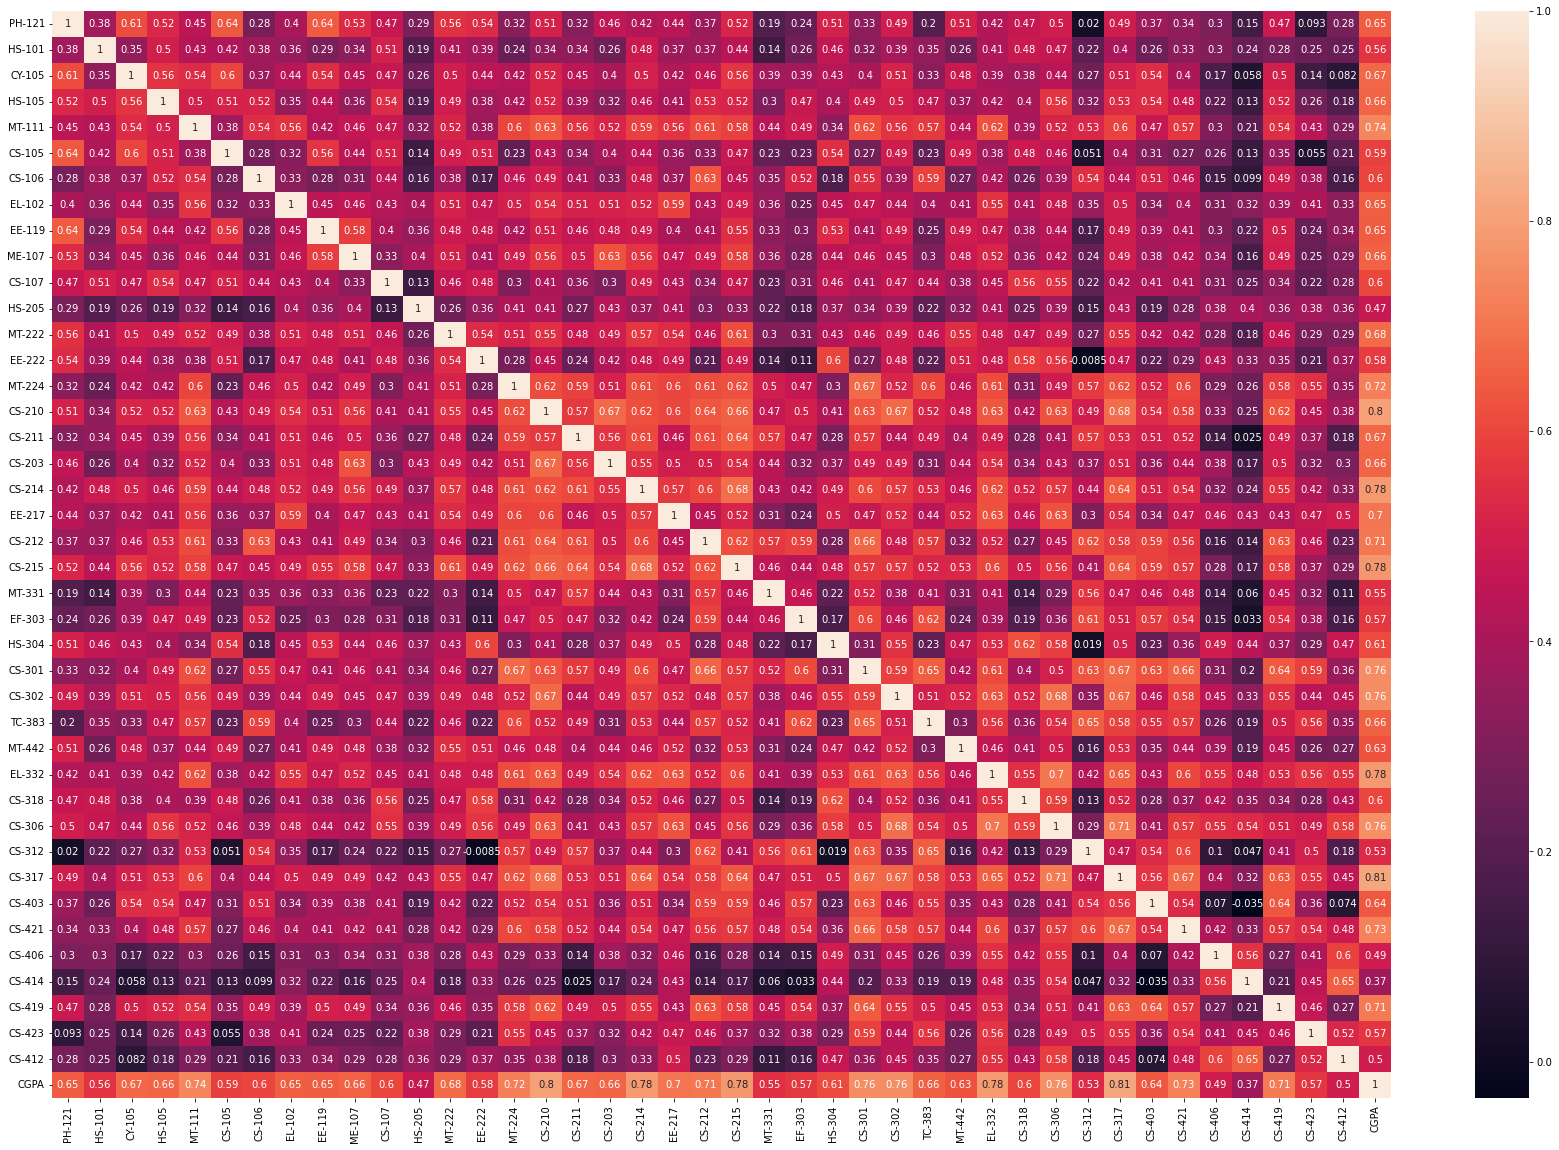

In [52]:
plt.figure(figsize=(30,20))
sns.heatmap(Data.corr(),annot=True)
plt.show()

In [65]:
# removing target variable

Z=Data.drop(['CGPA'],axis='columns')
Z

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,2.0,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.7,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.7,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,3.7,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,...,3.4,3.7,3.7,4.0,4.0,4.0,3.4,3.4,3.0,4.0
543,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,3.7,3.4,3.4,4.0,4.0,3.7,3.0,3.7,2.0,3.7
544,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,...,3.4,3.7,3.0,4.0,3.4,4.0,2.0,3.4,3.7,3.7
545,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,...,3.4,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0


In [71]:
y= Data['CGPA']

# Model Building:

**1. First Model ( prediction of final CGPA based on GPs of first 3 years using Linear Regression & Decision Tree Regressor ).**

**a) Linear Regression:**

In [66]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [67]:
# filters for selecting only first 3 year courses

X=Z
for column in Z.columns[Z.columns.str.contains('-4')]:
    X.drop([column],axis='columns',inplace=True)

X
    
 # It means search where column name have string ('-4') , as CS-403 has (-4).
# Then drop those columns  , because we're only dealing with first 3 years , so dealing with series starting from 1,2 & 3.
    



,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,2.4,3.0,2.0,2.4,2.0,1.7,2.0,1.7,1.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.7,3.7,1.4,1.7,2.0,3.7,1.0,1.4,1.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,2.4,4.0,3.4,3.7,3.0,3.4,3.7,3.7,3.0,3.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.0,2.7,1.0,2.7,1.4,1.4,3.4,1.7,1.4,2.0
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,1.7,3.7,2.7,3.7,2.4,3.7,2.7,3.7,2.7,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,...,3.0,3.7,3.7,4.0,4.0,4.0,4.0,3.4,3.7,3.7
543,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,3.4,3.4
544,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,...,3.0,2.7,3.4,3.4,4.0,3.0,2.4,3.4,3.7,3.0
545,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,...,1.0,2.0,2.0,2.4,1.7,1.0,2.7,3.4,1.0,3.0


In [69]:
# Verify no final year courses

X.columns[X.columns.str.contains('-4')]

Index([], dtype='object')

In [70]:
X.shape

(547, 33)

In [72]:
lr.fit(X,y)

LinearRegression()

In [73]:
X_train=lr.predict(X)
X_train[0:5]

array([2.15370365, 1.91168072, 3.55474112, 1.82410232, 3.46891893])

In [74]:
# Let's verify actual CGPA , for index 0 to 5

Data.loc[0:5,'CGPA']

0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
5    3.026
Name: CGPA, dtype: float64

**Results are very much close. We have compare predicted result of X_train for top five index with the actual result of CGPA. .**

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


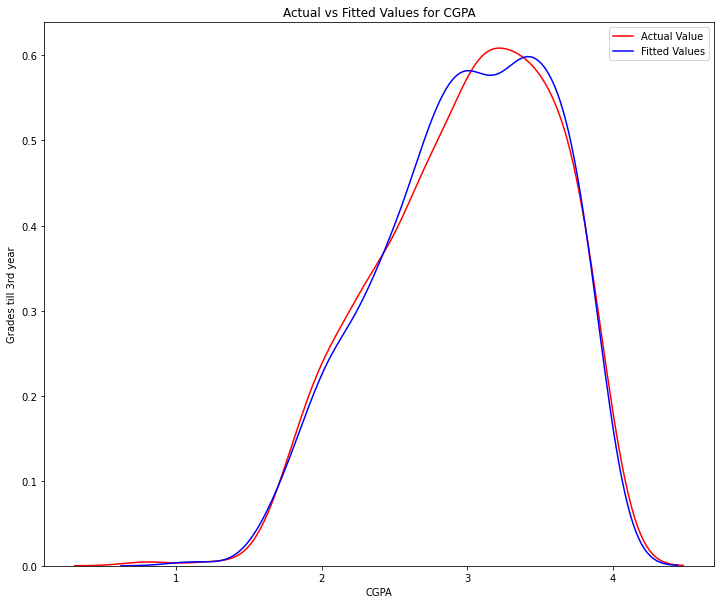

In [75]:
width = 12
height = 10
plt.figure(figsize=(width, height))


axs = sns.distplot(Data['CGPA'], hist=False, color="r", label="Actual Value")
sns.distplot(X_train, hist=False, color="b", label="Fitted Values" , ax=axs)


plt.title('Actual vs Fitted Values for CGPA')
plt.xlabel('CGPA')
plt.ylabel('Grades till 3rd year')

plt.legend()
plt.show()
plt.close()

# R-score & Mean Squared Error Of Linear Regression

In [77]:
from sklearn.metrics import mean_squared_error
R_score=lr.score(X,y)*100

MSE = mean_squared_error(y,X_train)

In [78]:
print(R_score)
print(MSE)

96.33769650138484
0.012612760998688334


**b) Decision Tree**

In [79]:
from sklearn.tree import DecisionTreeRegressor

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.40,random_state=0)
decisiontree = DecisionTreeRegressor()
dec_tree = decisiontree.fit(X_train, Y_train)

In [80]:
X_test_pred=dec_tree.predict(X_test)

In [81]:
X_test_pred[0:5]

array([2.96 , 3.218, 2.086, 3.184, 2.775])

In [82]:
# Let's display actual value of CGPA:

Data.loc[0:5,'CGPA']

0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
5    3.026
Name: CGPA, dtype: float64

# R-score & MSE Of Decision Tree

In [84]:
R_Score_=dec_tree.score(X_test,Y_test)*100

mse_ = mean_squared_error(Y_test,X_test_pred)

In [85]:
print(R_Score_)
print(mse_)

81.89597183136674
0.06426453424657533


#  Second Model ( prediction of final CGPA based on GPs of first two years using KNN & SVM )

In [87]:
# filtering out for first two years
first_two_years=first_three_years
for column in first_three_years.columns[first_three_years.columns.str.contains('-3')]:
    first_two_years.drop([column],axis='columns',inplace=True)
first_two_years
    

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.0,3.7,2.7,2.4,1.4,1.4,1.0,4.0,1.0,1.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,2.7,1.7,1.4,1.4,1.0,2.0,1.0,2.7,2.0,1.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,3.7,4.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,2.7,1.0,2.0,3.4,2.4,1.0,1.4,1.0,1.0
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,4.0,3.7,3.7,3.7,2.7,4.0,3.7,4.0,3.7,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.7
543,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,2.4,3.7,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0
544,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,...,3.0,3.4,3.0,3.7,4.0,3.4,3.0,4.0,3.4,3.0
545,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,...,1.0,1.0,3.0,2.7,3.0,2.7,2.0,2.7,1.4,1.4


In [88]:
first_two_years.columns[first_two_years.columns.str.contains('-3')]

Index([], dtype='object')

**a) KNN**

In [90]:
from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train, y_test = train_test_split(first_two_years, Data['CGPA'],test_size=0.4 ,random_state=0)

In [119]:
KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred=KNN.predict(X_test)
# print("Test set predictions:\n{}".format(KNN.predict(X_test)))

# R-score & Mean Squared Error Of KNN

In [93]:
R_model2_KNN=KNN.score(X_test, y_test)*100
mse_model2_KNN = mean_squared_error(y_test,y_pred)

In [94]:
print(R_model2_KNN)
print(mse_model2_KNN)

91.48512402313855
0.030225568239472353


**b) SVM**

In [96]:
from sklearn.svm import SVR
X_train,X_test,Y_train,Y_test = train_test_split(first_two_years, Data['CGPA'],test_size=0.50,random_state=0)


In [97]:
sv = SVR(kernel='linear')
sv.fit(X_train, Y_train)

SVR(kernel='linear')

In [98]:
X_train.shape

(273, 22)

In [99]:
y_pred2 = sv.predict(X_test)

# R-score & Mean Squared Error Of SVM

In [100]:
R_model2_SVM=sv.score(X_test, Y_test)*100
mse_model2_SVM = mean_squared_error(Y_test,y_pred2)

In [101]:
print(R_model2_SVM)
print(mse_model2_SVM)

94.52899009616812
0.01845985935736308


# Third Model ( prediction of final CGPA based on GPs of first year using Linear Regression & GPR )

In [103]:
first_year=first_two_years
for column in Z.columns[Z.columns.str.contains('-2')]:
    first_two_years.drop([column],axis='columns',inplace=True)
first_year

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,1.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,3.4
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,2.7
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,1.0
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,2.0
...,...,...,...,...,...,...,...,...,...,...,...
542,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,4.0
543,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,4.0
544,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,4.0
545,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,4.0


**a) Linear Regression**

In [105]:
lm2 = LinearRegression()
lm2
lm2.fit(first_year,Data['CGPA'])

LinearRegression()

In [106]:
pred=lm2.predict(first_year)

# R-score & Mean Squared Error Of Linear Regression

In [108]:
R_model3_lr=lm2.score(first_year, Data['CGPA'])*100
mse_model3_lr = mean_squared_error(Data['CGPA'],pred)

In [109]:
print(R_model3_lr)
print(mse_model3_lr)

84.29957810451309
0.05407134308263355


**b) Gaussian Process Regression**

In [110]:
from sklearn.gaussian_process.kernels import RBF
import sklearn.gaussian_process as gp

In [112]:
X_train,X_test,Y_train,Y_test = train_test_split(first_year,Data[['CGPA']],test_size=0.40,random_state=0)

In [113]:
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))

In [114]:
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1)

In [115]:
model.fit(X_train, Y_train)
params = model.kernel_.get_params()

In [116]:
pred2 = model.predict(X_test)


# R-score & Mean Squared Error Of Gaussian Process Regression

In [117]:
R_model3_GPR=model.score(X_test, Y_test)*100
mse_model3_GPR = mean_squared_error(Y_test,pred2)

In [118]:
print(R_model3_GPR)
print(mse_model3_GPR)

85.72596288779431
0.050669074213193825


**Conclusion : We have used many models to predict the student grades  , and predicted very much close results to the actual results.**